In [1]:
import pandas as pd
import numpy as np

import warnings 

warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('flights.csv')

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [4]:
df.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


df.DepDel15 = df.DepDel15.fillna(0)
df.head()

### Cleaning Outliers

DepDelay 
Minimum:-63.00
max:1425.00
Mean:10.35
Median:-1.00
Mode:-3.00

ArrDelay 
Minimum:-75.00
max:1440.00
Mean:6.50
Median:-3.00
Mode:0.00



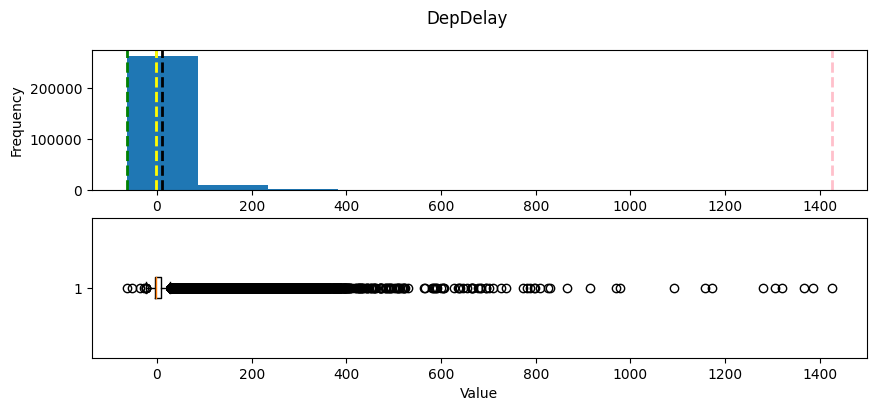

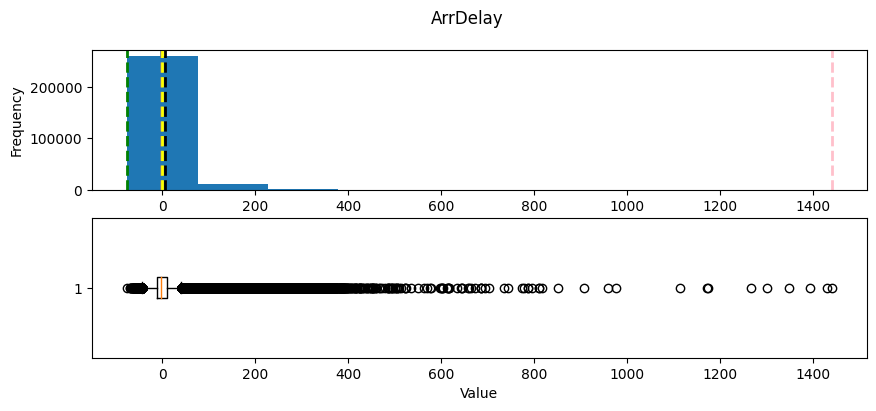

In [6]:
#function to show summary stats and distribution for a column 
def show_distribution(data):
    from matplotlib import pyplot as plt
    
    #Get stats
    min_val = data.min()
    max_val = data.max()
    mean_val = data.mean()
    med_val = data.median()
    mod_val = data.mode()[0]
    
    print(data.name,'\nMinimum:{:.2f}\nmax:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\n'.format(min_val,max_val,mean_val,med_val,mod_val))
                                                                                        
    #create a figure for 2 subplots(2 rows, 1 column)
    fig,ax = plt.subplots(2,1, figsize = (10,4))
    
     # Plot the histogram   
    ax[0].hist(data)
    ax[0].set_ylabel('Frequency')
    
    #add lines for the mean, median amd mode 
    ax[0].axvline(x=min_val, color = 'green', linestyle='dashed',linewidth=2)
    ax[0].axvline(x=max_val, color = 'pink', linestyle='dashed',linewidth=2)
    ax[0].axvline(x=mean_val, color = 'black', linestyle='dashed',linewidth=2)
    ax[0].axvline(x=med_val, color = 'gray', linestyle='dashed',linewidth=2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed',linewidth=2)
    
    
    # Plot the boxplot   
    ax[1].boxplot(data, vert=False)
    ax[1].set_xlabel('Value')
    
    #add a title to the figure
    fig.suptitle(data.name)
    
    #show figure 
    fig.show()

#call function for each delay
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    show_distribution(df[col])

There outliers both the upper and lower ends when observing the boxplot - especially in the upper ends 


Lets perform a trim so that we have values between 1% and 90% (1st and 90th percentile)

DepDelay 
Minimum:-11.00
max:36.00
Mean:-0.13
Median:-2.00
Mode:-3.00

ArrDelay 
Minimum:-32.00
max:16.00
Mean:-5.68
Median:-6.00
Mode:0.00



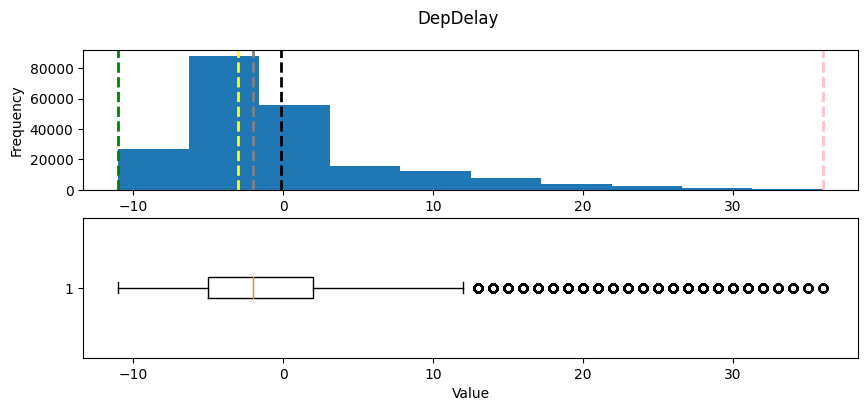

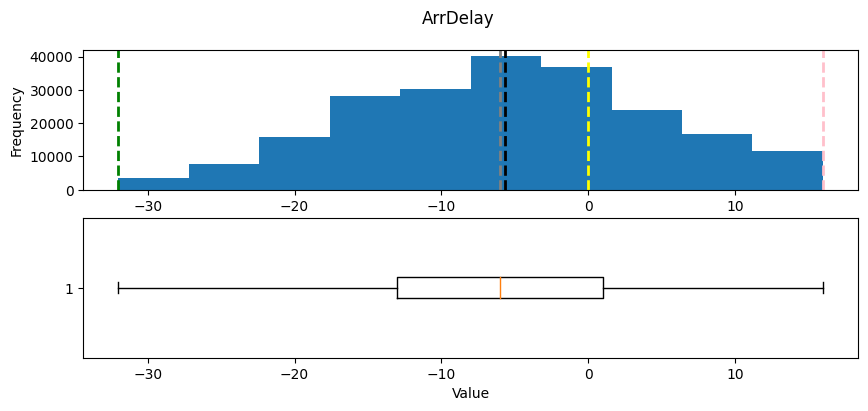

In [7]:
#Trim Depdelay 
dep_01pc = df.DepDelay.quantile(0.01)
dep_90pc = df.DepDelay.quantile(0.90)
df = df[df.DepDelay < dep_90pc]
df = df[df.DepDelay > dep_01pc]

#Trim ArrDelay
arr_01pc = df.ArrDelay.quantile(0.01)
arr_90pc = df.ArrDelay.quantile(0.90)
df = df[df.ArrDelay < arr_90pc]
df = df[df.ArrDelay > arr_01pc]


for col in delayFields:
    show_distribution(df[col])

Thats more like it

### Explore the Data 

In [8]:
#lets view the various stacs
df.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214500.0,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,211739.000000,214500.000000,214500.000000,214500.000000,214500.000000
mean,2013.0,7.027296,15.799389,3.904168,12755.329371,12734.206438,1284.230942,-0.130452,0.058355,1465.878522,-5.680522,0.032597,0.013305
std,0.0,2.006267,8.853235,1.998344,1512.139480,1506.103555,470.230018,7.260672,0.234414,487.646410,10.188473,0.177579,0.114579
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,853.000000,-5.000000,0.000000,1055.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1240.000000,-2.000000,0.000000,1448.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1658.000000,2.000000,0.000000,1850.000000,1.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,1.000000,2359.000000,16.000000,1.000000,1.000000


#### Whats are the mean for the two delays (arrival and depature )?

In [9]:
df[delayFields].mean()

DepDelay   -0.130452
ArrDelay   -5.680522
dtype: float64

#### How do the carriers compare in terms of arrival delay performance?

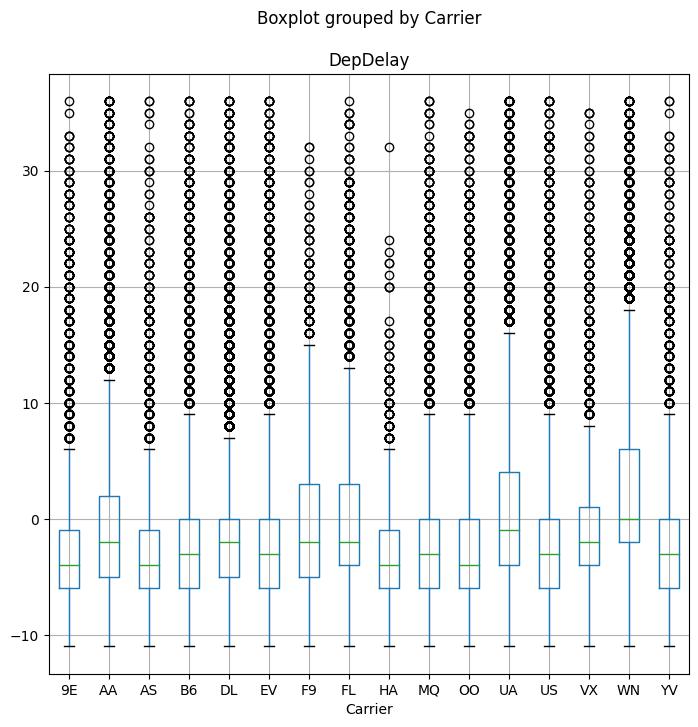

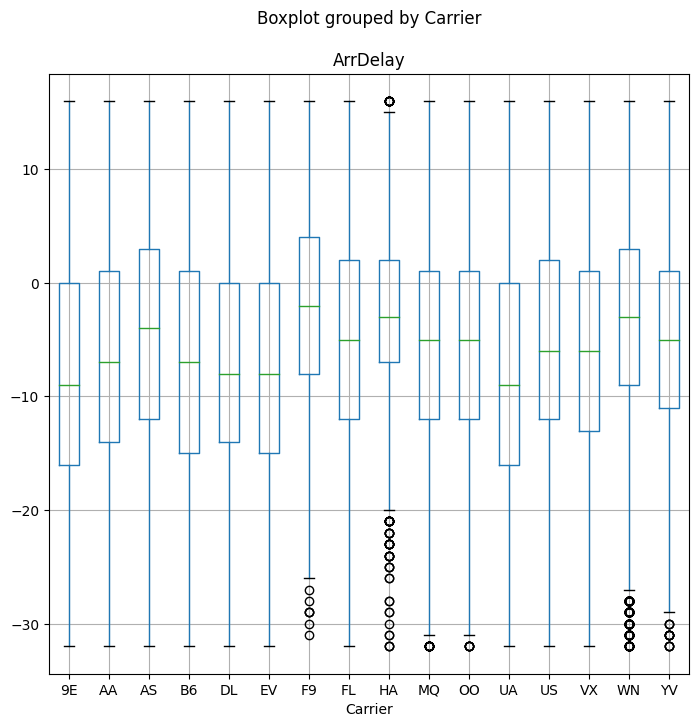

In [10]:
for col in delayFields:
    df.boxplot(column=col,by='Carrier',figsize=(8,8))

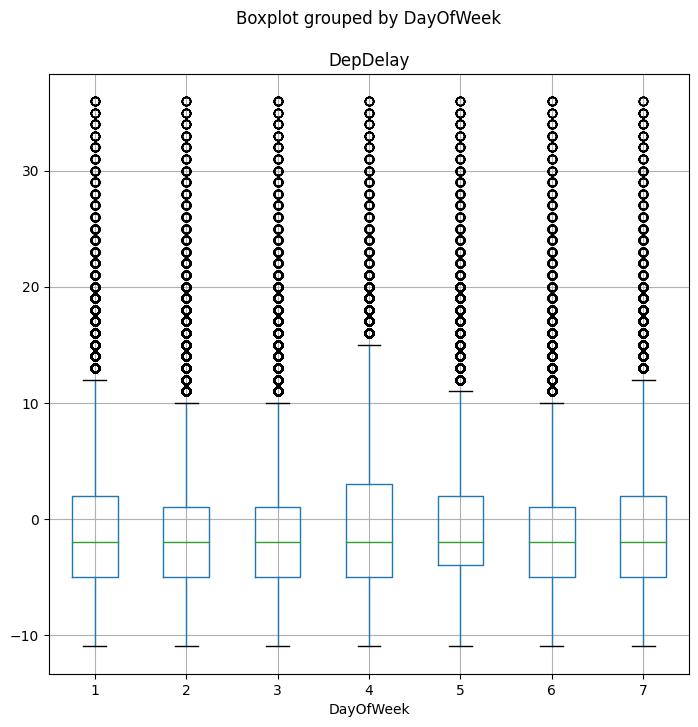

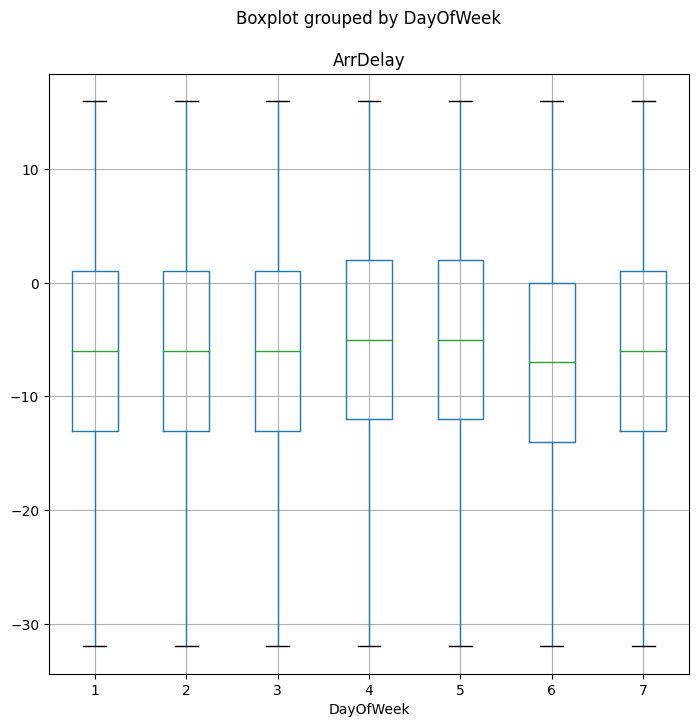

In [11]:
for col in delayFields:
    df.boxplot(column=col,by='DayOfWeek',figsize=(8,8))

#### Which departure airport has the highest average departure delay?


,DepDelay
OriginAirportName,
Chicago Midway International,3.865294
Dallas Love Field,3.039141
William P Hobby,2.706247
Denver International,1.863804
Baltimore/Washington International Thurgood Marshall,1.805401
...,...
Tucson International,-2.522114
Richmond International,-2.665944
Ted Stevens Anchorage International,-2.886700


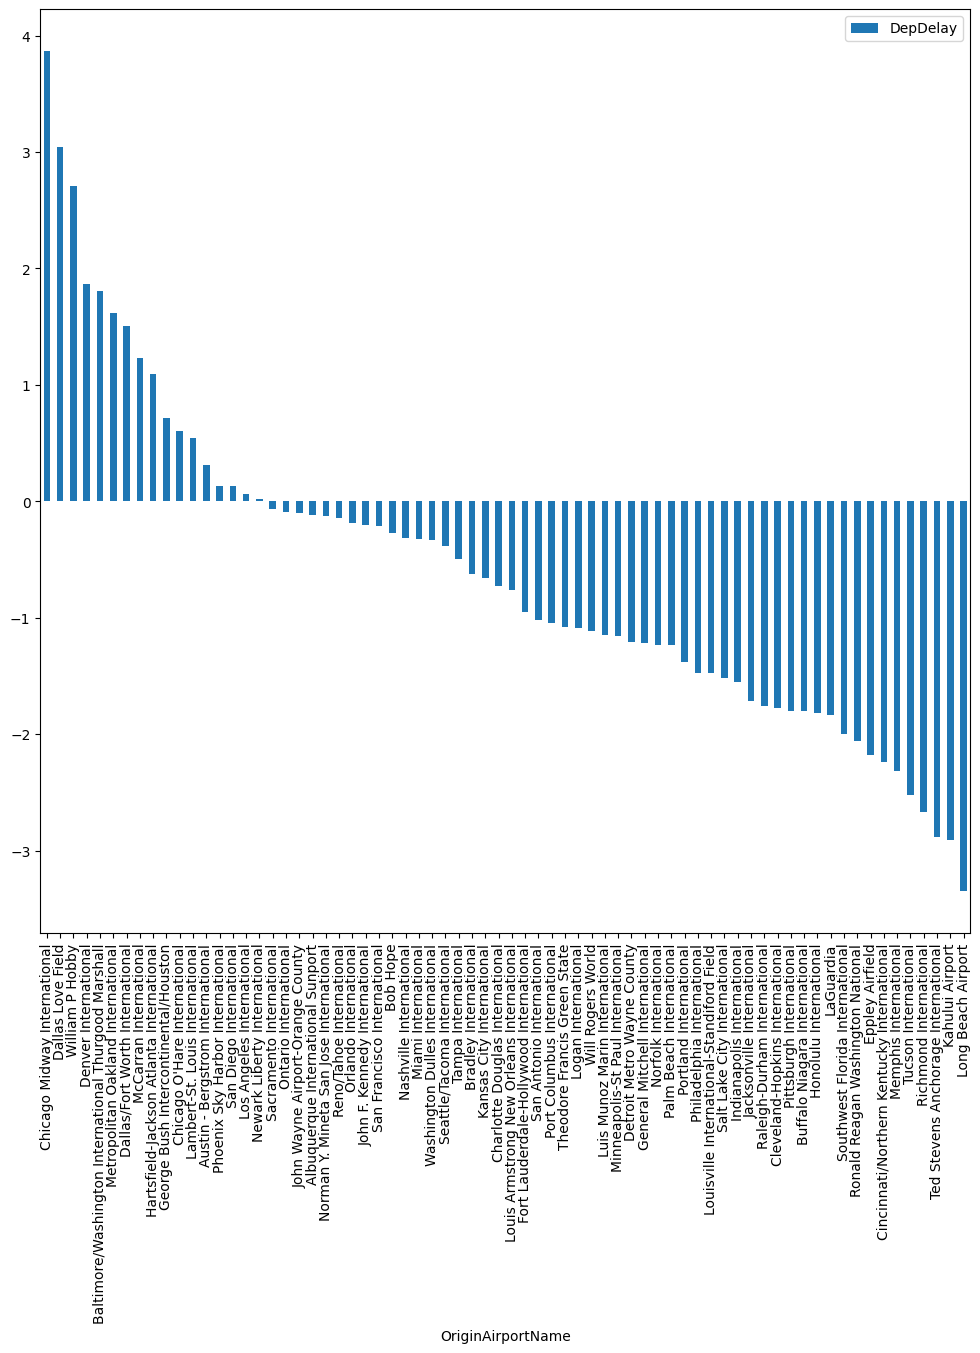

In [12]:
df_depgroup = df.groupby(df.OriginAirportName)

mean_depdelay = pd.DataFrame(df_depgroup['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_depdelay.plot(kind = "bar", figsize=(12,12))
mean_depdelay


#### Do late Depatures tend to result in longer arrival delays than on-time departures ?

<AxesSubplot: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

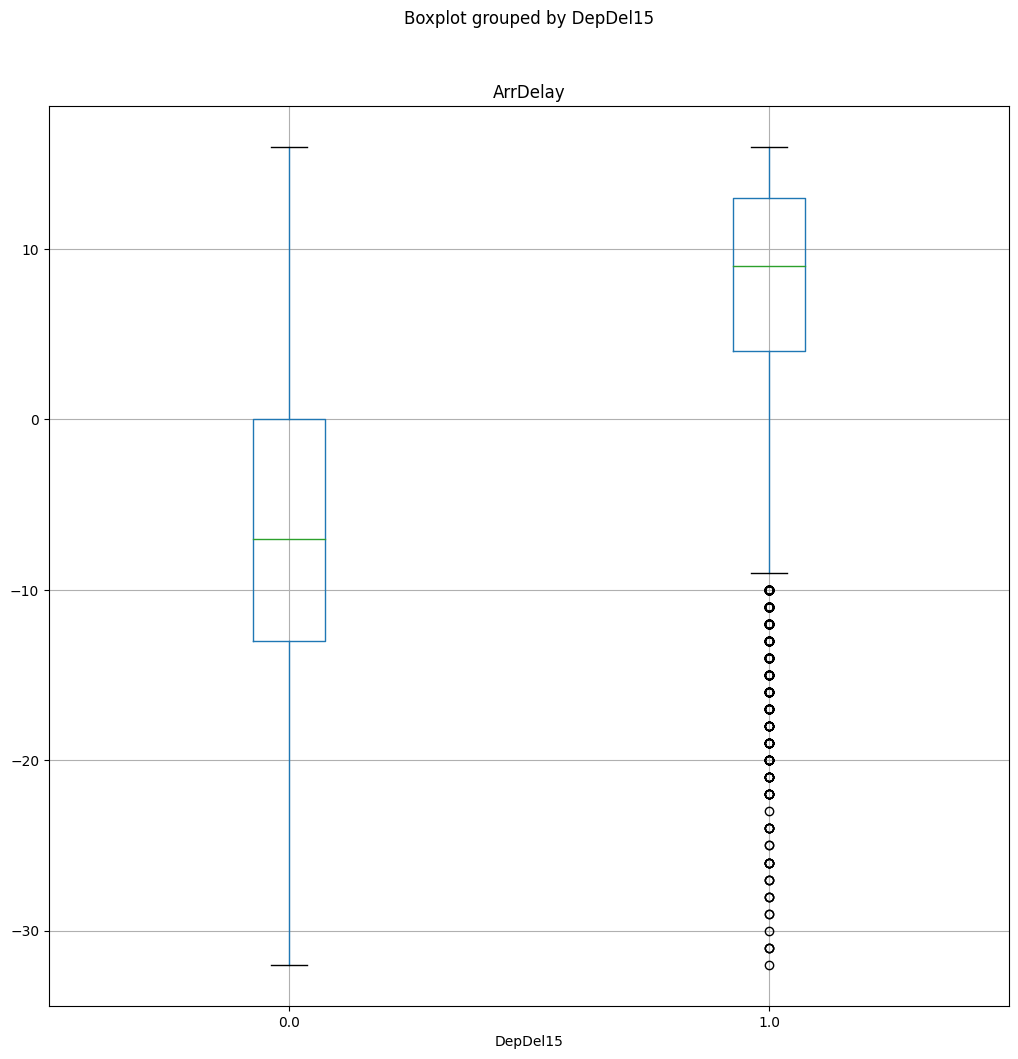

In [13]:
df.boxplot(column='ArrDelay', by='DepDel15',figsize=(12,12))

#### Which route (from origin airport to destination airport) has the most late arrivals?

In [14]:
#creating route column
routes = pd.Series(df['OriginAirportName']+ '>'+df['DestAirportName'])
df = pd.concat([df,routes.rename("Route")], axis = 1)

#grouping by routes 
route_group = df.groupby(df.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International>Los Angeles International,67
Los Angeles International>San Francisco International,42
Detroit Metro Wayne County>Chicago O'Hare International,29
LaGuardia>Logan International,29
LaGuardia>Chicago O'Hare International,27
...,...
Norman Y. Mineta San Jose International>Honolulu International,0
Norman Y. Mineta San Jose International>Hartsfield-Jackson Atlanta International,0
Norman Y. Mineta San Jose International>George Bush Intercontinental/Houston,0


#### Which route has the highest average arrival delay?

In [15]:
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Theodore Francis Green State>Southwest Florida International,12.000000
Charlotte Douglas International>General Mitchell International,10.000000
Indianapolis International>Philadelphia International,10.000000
Port Columbus International>Logan International,7.000000
Cleveland-Hopkins International>Philadelphia International,7.000000
...,...
Lambert-St. Louis International>Cleveland-Hopkins International,-20.000000
Jacksonville International>Chicago Midway International,-20.000000
Eppley Airfield>LaGuardia,-20.750000
